# Recurrent Neural Networks - Predicting AAPL Stock Price

In [1]:
# --- Data Manipulation
import numpy as np
import pandas as pd
# --- Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# --- Handling Time
from datetime import datetime

## 0 -  `Pandas Reader`

⚙️ To begin this challenge, let's install <a href="https://pandas-datareader.readthedocs.io/en/latest/">`pandas_reader`</a>.

> `pip install pandas_datareader`

> `pip install --upgrade pandas_reader`

💹 With the `pandas_reader` library , you can retrieve financial and economic data from different sources directly with a query.There is no need to store the queried dataset in a `.csv` file, you can manipulate it in a Notebook straight "out of the box".

* [**`Remote Data Acsess`**](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html):
    - [Yahoo Finance](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo)
    - [OECD Statistics](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-oecd)
    - [World Bank's World Development Indicators](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-wb)
    - [The Investors Exchange - IEX](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-iex) (⚠️ Requires an API Key)
* [**`Python Module Index of the library`**](https://pandas-datareader.readthedocs.io/en/latest/py-modindex.html)

⚠️ *Note that for some of them, you will need to pay a subscription to get acccess to their API.*

In [11]:
!pip install pandas_datareader

In [12]:
!pip install --upgrade pandas_datareader

     |████████████████████████████████| 109 kB 9.8 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


## 1 - Loading financial data

In [2]:
# --- Reading Financial Data
from pandas_datareader.data import DataReader

📈 Let's load the stock prices of the GAFA:
- `GOOG`: Google
- `AAPL` : Apple
- `FB` : Meta/Facebook
- `AMZN` : Amazon

In [3]:
tech_companies = ["GOOG","AAPL", "FB", "AMZN"]
company_names = ["Google","Apple", "Facebook", "Amazon"]

### 1.1. `Time Interval`

📆 We will focus on the values:
- from 5 years ago 
- to today

❓ Store the `current date` in a variable called `today`

In [4]:
today = datetime.now()
today

datetime.datetime(2021, 11, 29, 15, 27, 0, 170780)

👉 In a `datetime object`, you can access attributes like the _year_, the _month_, the _day_, etc...

In [5]:
# In what year are we ? 
# $DELETE_BEGIN
today.year
# $DELETE_END

2021

In [6]:
# In what month are we ? 
# $DELETE_BEGIN
today.month
# $DELETE_END

11

😉 Based on this, after you can also define the `start` date.

In [7]:
start = datetime(today.year - 5, 1, 1)
start

datetime.datetime(2016, 1, 1, 0, 0)

### 1.2. Historical stock prices

❓ Create a `stock_prices` dictionnary where you will store the historical financial stock prices of each big tech company.

_Note:_ for each Dataframe, add a column where you will store the company name.

In [8]:
stock_prices = {}


for tech_company, company_name in zip(tech_companies, company_names):
    stock_prices[tech_company] = DataReader(tech_company, "yahoo", start, today)
    stock_prices[tech_company]["company_name"] = company_name

RemoteDataError: ignored

❓ Show  the values of these stocks seen these last three days.

In [ ]:
stock_prices.keys()

In [ ]:
for company_name, tech_company in stock_prices.items():
    print(f"---- {company_name} stock price during the last 3 days -----")
    print(tech_company.shape)
    display(tech_company.tail(3))
    print("")

## 2 - Time Series - Exploratory Data Analysis EDA

### 2.1. Historical Stock Prices

📈 Plot the evolution of the four stock prices. 

Do they you look correlated ?

In [ ]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(tech_companies, 1):
    plt.subplot(2, 2, i)
    stock_prices[company]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_names[i - 1]}")
    
plt.tight_layout()

### 2.2. Volumes Traded

📈 What about the volumes traded ?

In [ ]:
# Let's see a historical view of the volumes traded


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(tech_companies, 1):
    plt.subplot(2, 2, i)
    stock_prices[company]['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Traded volumes for {company_names[i - 1]}")
    
plt.tight_layout()

### 2.3. Daily returns

🤑 And their rates of return ?  The formula is: $$ return = \frac{new - old}{old} $$

But it is also already implemented in `Pandas Series` with the built-in function `pct_change()`

In [ ]:
# penultimate_known_value_appl 
old =  stock_prices["AAPL"]['Adj Close'][-2]
print(f"penultimate value of the AAPL stock price = {round(old,3)}")

# last_known_value_appl 
new = stock_prices["AAPL"]['Adj Close'][-1]
print(f"last known value of the AAPL stock price = {round(new,3)}")

# percentage change
print(f"percentage of change = ({round(new,3)} - {round(old,3)})/{round(old,3)} = {round((new-old)/old,3)}")

In [9]:
for tech_company in tech_companies:
    stock_prices[tech_company]['Daily Return'] = stock_prices[tech_company]['Adj Close'].pct_change()   

KeyError: ignored

In [ ]:
# Let's quickly verify that the pct_change function worked
round(stock_prices["AAPL"][['Adj Close', 'Daily Return']].tail(2),3)

KeyError: ignored

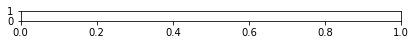

In [10]:
# Let's see a historical view of their returns

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(tech_companies, 1):
    plt.subplot(2, 2, i)
    stock_prices[company]['Daily Return'].dropna().plot()
    plt.ylabel('Daily Return')
    plt.xlabel(None)
    plt.title(f"Historical returns for {company_names[i - 1]}")
    
plt.tight_layout()

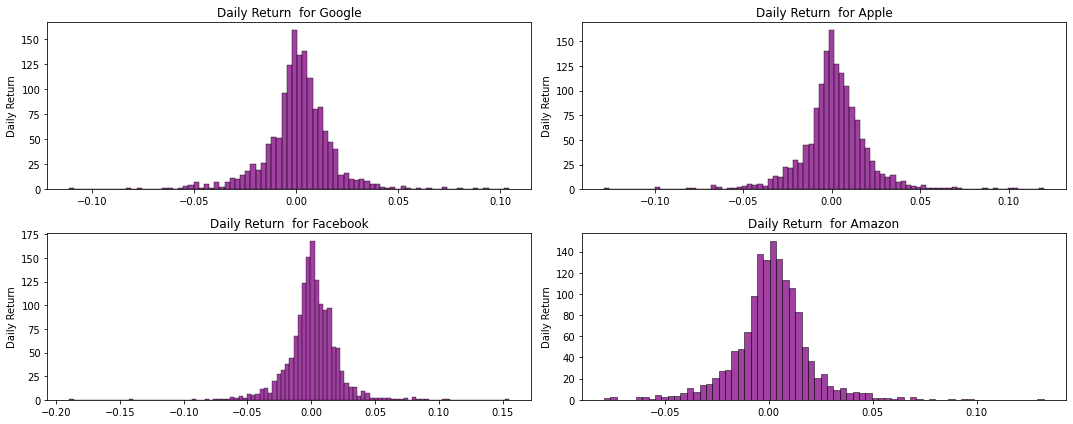

In [ ]:
# What about the distributions of these returns ? 


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, tech_company in enumerate(tech_companies, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data = stock_prices[tech_company], x = 'Daily Return', color="purple")
    plt.ylabel('Daily Return')
    plt.xlabel(None)
    plt.title(f"Daily Return  for {company_names[i - 1]}")
    
plt.tight_layout()

### 2.4. Correlations in the tech industry

💡 You can call the `pandas_reader` on multiple companies simulatenously.

In [ ]:
big_tech = DataReader(tech_companies, "yahoo", start, today)["Adj Close"]
big_tech.tail()

Symbols,GOOG,AAPL,FB,AMZN
Date,,,,
2021-11-08,2987.030029,150.440002,338.619995,3488.979980
2021-11-09,2984.969971,150.809998,335.369995,3576.229980
2021-11-10,2932.520020,147.919998,327.640015,3482.050049
2021-11-11,2934.959961,147.869995,327.739990,3472.500000
2021-11-12,2992.909912,149.990005,340.890015,3525.149902


💡 You can compute the `pct_change()` column-wise as well.

In [ ]:
daily_returns = big_tech.pct_change()
daily_returns.tail()

Symbols,GOOG,AAPL,FB,AMZN
Date,,,,
2021-11-08,0.000740,-0.005553,-0.007358,-0.008528
2021-11-09,-0.000690,0.002459,-0.009598,0.025007
2021-11-10,-0.017571,-0.019163,-0.023049,-0.026335
2021-11-11,0.000832,-0.000338,0.000305,-0.002743
2021-11-12,0.019745,0.014337,0.040123,0.015162


🤔 How are the daily returns of Google, Apple, Facebook/Meta and Amazon correlated ? 

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

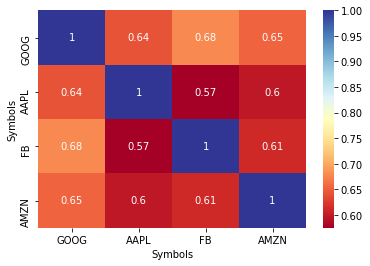

In [ ]:
sns.heatmap(daily_returns.corr(),annot=True, cmap="RdYlBu")

## 3 - Predicting the AAPL Stock Price - V1

👉 `Apple`, `Google`, `Facebook` and `Amazon` look quite correlated.

👀 But first, let's try to predict the AAPL stock price without using its competitors' info.

⚠️ A Neural Network needs to be fed with many subsequences but in this case, we will have to build subsequences ourselves, as shown in the following image:

**`INSERT THE ILLUSTRATION ABOUT SUBSAMPLING A TIME-SERIES MULTIPLE TIMES HERE`**

In [ ]:
aapl = stock_prices["AAPL"]
aapl.tail(5)

,High,Low,Open,Close,Volume,Adj Close,company_name,Daily Return
Date,,,,,,,,
2021-11-08,151.570007,150.160004,151.410004,150.440002,55020900.0,150.440002,Apple,-0.005553
2021-11-09,151.429993,150.059998,150.199997,150.809998,56787900.0,150.809998,Apple,0.002459
2021-11-10,150.130005,147.850006,150.020004,147.919998,65187100.0,147.919998,Apple,-0.019163
2021-11-11,149.429993,147.679993,148.960007,147.869995,41000000.0,147.869995,Apple,-0.000338
2021-11-12,150.399994,147.479996,148.429993,149.990005,63632600.0,149.990005,Apple,0.014337


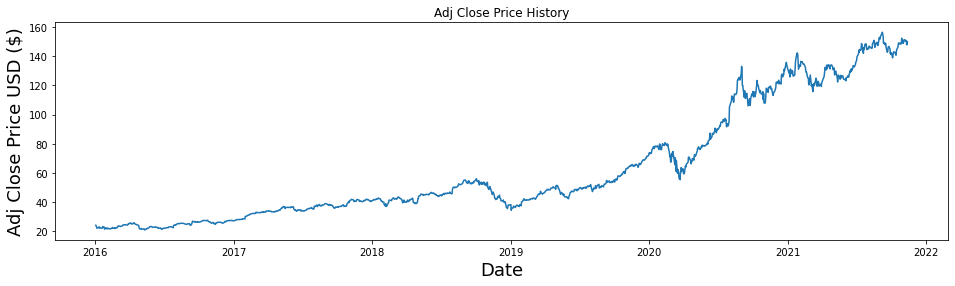

In [ ]:
plt.figure(figsize=(16,4))
plt.title('Adj Close Price History')
plt.plot(aapl["Adj Close"])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.show()

⚙️ Neural Networks require tensors/arrays...

In [ ]:
data_aapl = aapl[["Close"]].values
print(type(data_aapl))
display(data_aapl)
print(data_aapl.shape)

<class 'numpy.ndarray'>


array([[ 26.33749962],
       [ 25.67749977],
       [ 25.17499924],
       ...,
       [147.91999817],
       [147.86999512],
       [149.99000549]])

(1478, 1)


### 3.1. Time Series Preparation

#### Temporal Train-Test Slit

❌ We can't do a traditional holdout method due to the temporal nature of our dataset. 

☢️ It would cause a data leakage... 

✂️ So let's do it manually.

In [ ]:
train_percentage = 0.90

# Identifing the first day of the test set
idx_cut = int(len(data_aapl) * train_percentage)

aapl_train = data_aapl[:idx_cut]
aapl_test = data_aapl[idx_cut:]

In [ ]:
assert(aapl_train.shape[0] + aapl_test.shape[0] == data_aapl.shape[0])

#### Subsampling a unique Time Series

* **<u>Draft</u>** (for example)

    - If I want to predict the AAPL stock price in 65 days, I can define/choose:
        - 5 days/week $\times$ 4 weeks/month $\times$ 3 months = a `length` of 60 days
        - and a`horizon` = 5 to predict the value 5 days after this temporal window
    - **` ⚠️ TO DO ⚠️ : we could also predict consecutive values...`** 


In [ ]:
# -- X in the subsample
length = 5 * 4 * 3

# -- Target in the subsample
horizon = 1

Then, I have to compute the `last_possible_start` of my subsequence as follows:

In [ ]:
last_possible_start = len(aapl_train) - length - horizon
last_possible_start

1269

Now I can choose a `random_start`.

_(Run the next cell multiple times, you will have a different starting point for each run)_

In [ ]:
random_start = np.random.randint(0, last_possible_start)
random_start

496

In [ ]:
one_subsequence = aapl_train[random_start:random_start + length]
one_subsequence.shape

(60, 1)

In [ ]:
one_target = aapl_train[random_start + length + horizon]
one_target.shape

(1,)

* ***Python functions***

**`subsequence`**

In [ ]:
def subsequence(df, length, horizon):
    last_possible_start = len(df) - length - horizon
    random_start = np.random.randint(0, last_possible_start)
    X = df[random_start:random_start + length]
    y = df[random_start + length + horizon][0]
    
    return X, y

In [ ]:
subsequence(aapl_train, length, horizon)

(array([[26.87000084],
        [26.72750092],
        [26.78249931],
        [26.49250031],
        [26.42000008],
        [26.27000046],
        [26.08749962],
        [24.45499992],
        [23.70750046],
        [23.43499947],
        [23.40999985],
        [23.79500008],
        [23.54750061],
        [23.30999947],
        [23.18000031],
        [23.19750023],
        [23.35499954],
        [23.12750053],
        [22.58499908],
        [22.62999916],
        [23.46999931],
        [23.37249947],
        [23.63999939],
        [23.54999924],
        [23.80500031],
        [24.10750008],
        [24.47500038],
        [24.90500069],
        [25.10250092],
        [25.08749962],
        [24.96500015],
        [24.61499977],
        [24.43000031],
        [24.47999954],
        [24.65749931],
        [24.75749969],
        [24.73500061],
        [24.91250038],
        [24.70750046],
        [24.33499908],
        [24.36499977],
        [24.28499985],
        [24.38750076],
        [23

**`multiple_subsequences`**

In [ ]:
def multiple_subsequences(df, number_of_subsequences , minimum_days, maximum_days, horizon = 1):
    
    list_of_X = []
    list_of_y = []
    
    # we'll generate number_of_subsequences subsequences 
    # with random lengths between minimum_days and maximum_days

    list_of_lengths = np.random.randint(minimum_days, maximum_days, number_of_subsequences) 
    
    for length in list_of_lengths:
        tmp_X, tmp_y = subsequence(df, length, horizon)
        list_of_X.append(tmp_X)
        list_of_y.append(tmp_y)
        
    
    return list_of_X, list_of_y

In [ ]:
minimum_days = 30
maximum_days = 90 + 1

X_train, y_train = multiple_subsequences(aapl_train, 
                                         number_of_subsequences = 200, 
                                         minimum_days = minimum_days,
                                         maximum_days = maximum_days, 
                                         horizon = 1)

X_test, y_test = multiple_subsequences(aapl_test, 
                                         number_of_subsequences = 200, 
                                         minimum_days = minimum_days,
                                         maximum_days = maximum_days, 
                                         horizon = 1)

###  3.2. LSTM/GRU Modelling

#### Pad Sequences

🧑🏻‍🏫 Do you remember ? We feed Neural Networks with Tensors, and this holds True for Recurrent Neural Networks. 

By generating random subsequences, we will have different lengths...

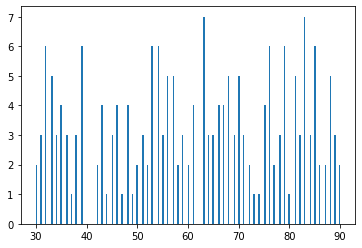

In [ ]:
plt.hist([len(_) for _ in X_train], bins = len(X_train));

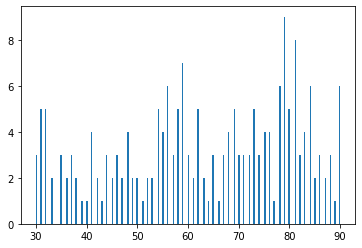

In [ ]:
plt.hist([len(_) for _ in X_test], bins = len(X_test));

👉 Let's pad these sequences

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_pad = pad_sequences(X_train, value = -999, padding = "post", dtype="float64")
X_test_pad = pad_sequences(X_test, value = -999, padding = "post", dtype="float64")

In [ ]:
X_train_pad.shape

(200, 90, 1)

In [ ]:
X_test_pad.shape

(200, 90, 1)

#### RNN Architecture and Compiler

In [ ]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras import metrics, optimizers

def my_rnn():
    
    ####################################
    #         The RNN Architecture     #
    ####################################
    
    
    # Declaring the Sequential Model
    model = Sequential()
    
    # Informing the model which value was used as an absurd value for padding
    model.add(layers.Masking(mask_value=-999))

    # First LSTM Layer
    model.add(layers.LSTM(units=128,
                          return_sequences = False, # Mandatory to stack a second RNN Layer on top of it
                          activation = "tanh", 
                          input_shape = X_train_pad[0].shape)) 
                          # Non-mandatory but why not since we padded the sequences
        
    # Second Recurrent Layer, you can mix SimpleRNN, LSTM and GRU    
    model.add(layers.GRU(units=64,
                          return_sequences = False,
                          activation = "tanh"))

    # As for the CNN, we can let the "information flow" a bit in an Intermediate Hidden Dense Layer
    model.add(layers.Dense(25, activation="relu"))
    
    # The Prediction Layer
    model.add(layers.Dense(1, activation="linear"))
                            # Even though a stock price is positive,
                            # Let's keep linear instead of "relu" to spot absurd predictions
            
    ####################################
    #         The RNN Compiler         #
    ####################################
    
    
    # Using my "customized optimizer"
    # my_rmsprop = optimizers.RMSprop(learning_rate=0.003) # By default, it is set to 0.001
    
    # Using my "own" metrics
    # my_mae = metrics.MeanAbsoluteError(name='mean_absolute_error', dtype=None)
    

    # Compiling the model accordingly
    
#     model.compile(loss="mse",
#                   optimizer = my_rmsprop,
#                   metrics = [my_mae])
    
    model.compile(loss="mse",
                  optimizer = "rmsprop",
                  metrics = ["mae"])
  
    return model

my_rnn_model = my_rnn()

2021-11-14 23:55:29.933042: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping 

es = EarlyStopping(patience = 25, 
                   restore_best_weights = True, 
                   monitor = "val_mean_absolute_error", 
                   mode = "min")


history = my_rnn_model.fit(X_train_pad, 
                           np.array(y_train),
                           validation_split = 0.3,
                           batch_size = 16,
                           epochs = 300,
                           verbose = 1,
                           callbacks = [es])

2021-11-14 23:55:30.094806: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300


ValueError: in user code:

    /Users/davywai/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /Users/davywai/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/davywai/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/davywai/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/davywai/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/davywai/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /Users/davywai/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /Users/davywai/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/keras/engine/base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/davywai/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/keras/engine/sequential.py:383 call
        outputs = layer(inputs, **kwargs)
    /Users/davywai/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/keras/layers/recurrent.py:659 __call__
        return super(RNN, self).__call__(inputs, **kwargs)
    /Users/davywai/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/davywai/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/keras/engine/input_spec.py:214 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer gru is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 128)


In [ ]:
def plot_loss_mae(history):
    
    fig, ax =plt.subplots(1,2,figsize=(20,5))
    
    # --- LOSS
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend(['Train', 'Val'], loc='upper right')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- MAE

    ax[1].plot(history.history['mean_absolute_error'])
    ax[1].plot(history.history['val_mean_absolute_error'])
    ax[1].set_title('Model MAE', fontsize = 18)
    ax[1].set_xlabel('Epoch', fontsize = 14)
    ax[1].set_ylabel('Recall', fontsize = 14)
    ax[1].legend(['Train', 'Val'], loc='lower right') 
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)   
    
    plt.show()
    

In [ ]:
plot_loss_mae(history)

#### Evaluating

In [ ]:
res = my_rnn_model.evaluate(X_test_pad, np.array(y_test), verbose = 1)
res


#### Predicting

In [ ]:
predictions = my_rnn_model.predict(X_test_pad)

### 3.3. Baseline Model : the `Last Seen Value`

🧑🏻‍🏫 In a regression task, we often consider `np.mean(y_train)` as the baseline prediction.

📈 But Time Series, it may be more relevant to consider the `last seen value`

In [ ]:
# Baseline predictions
X_test_last_seen_value = np.array([_[-1][0] for _ in X_test])

In [ ]:
#MAE
np.mean(np.abs(y_test - X_test_last_seen_value))

In [ ]:
#RMSE
np.sqrt(np.mean((y_test - X_test_last_seen_value)**2))

## 4 - Predicting the AAPL Stock Price - V2

👉 `Apple`, `Google`, `Facebook` and `Amazon` look quite correlated.

👀 Now, let's try to incorporate them all into our predictions for Apple.

In [ ]:
big_tech.tail()

In [ ]:
train_percentage = 0.90

# Identifing the first day of the test set
idx_cut = int(len(big_tech) * train_percentage)

big_tech_train = big_tech[:idx_cut]
big_tech_test = big_tech[idx_cut:]

In [ ]:
def subsequence_v2(df, length, horizon):
    last_possible_start = len(df) - length - horizon
    random_start = np.random.randint(0, last_possible_start)
    X = df.iloc[random_start:random_start + length,:].values
    y = df.iloc[random_start + length + horizon][0]
    
    return X, y

In [ ]:
def multiple_subsequences_v2(df, number_of_subsequences , minimum_days, maximum_days, horizon = 1):
    
    list_of_X = []
    list_of_y = []
    
    # we'll generate number_of_subsequences subsequences 
    # with random lengths between minimum_days and maximum_days

    list_of_lengths = np.random.randint(minimum_days, maximum_days, number_of_subsequences) 
    
    for length in list_of_lengths:
        tmp_X, tmp_y = subsequence_v2(df, length, horizon)
        list_of_X.append(tmp_X)
        list_of_y.append(tmp_y)
        
    
    return list_of_X, list_of_y

In [ ]:
minimum_days = 30
maximum_days = 90 + 1

X_train, y_train = multiple_subsequences_v2(big_tech_train, 
                                         number_of_subsequences = 200, 
                                         minimum_days = minimum_days,
                                         maximum_days = maximum_days, 
                                         horizon = 1)

X_test, y_test = multiple_subsequences_v2(big_tech_test, 
                                         number_of_subsequences = 200, 
                                         minimum_days = minimum_days,
                                         maximum_days = maximum_days, 
                                         horizon = 1)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_pad = pad_sequences(X_train, value = -999, padding = "post", dtype="float64")
X_test_pad = pad_sequences(X_test, value = -999, padding = "post", dtype="float64")

In [ ]:
my_rnn_model_2 = my_rnn()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping 

es_2 = EarlyStopping(patience = 25, 
                   restore_best_weights = True, 
                   monitor = "val_mean_absolute_error", 
                   mode = "min")


history_2 = my_rnn_model_2.fit(X_train_pad, 
                           np.array(y_train),
                           validation_split = 0.3,
                           batch_size = 16,
                           epochs = 300,
                           verbose = 1,
                           callbacks = [es])

In [ ]:
res_2 = my_rnn_model_2.evaluate(X_test_pad, np.array(y_test), verbose = 1)
res_2


In [ ]:
predictions_2 = my_rnn_model_2.predict(X_test_pad)

🏁 **`Congratulations`**

💪 You made it to the end of the **`Recurrent Neural Networks`** session

🚀 We will use these RNN for our next topic **`Natural Language Processing - version Deep Learning`**